In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# read files
df = pd.read_csv('norm_selected_pixels.csv')

In [3]:
df.head()

,px_1456,px_1408,px_1504,px_1503,px_1455,px_1551,px_1552,px_1361,px_1360,px_1409,...,px_82,px_12,px_14,px_29,px_1217,px_1612,px_36,px_28,px_83,emotion
0,0.654902,0.674510,0.639216,0.635294,0.654902,0.627451,0.619608,0.698039,0.701961,0.662745,...,0.654902,0.349020,0.474510,0.670588,0.705882,0.713725,0.443137,0.619608,0.454902,0
1,0.360784,0.388235,0.349020,0.337255,0.439216,0.243137,0.384314,0.376471,0.364706,0.450980,...,0.533333,0.600000,0.678431,0.631373,0.474510,0.654902,0.631373,0.650980,0.423529,0
2,0.650980,0.772549,0.670588,0.556863,0.611765,0.772549,0.764706,0.654902,0.800000,0.533333,...,0.792157,0.152941,0.541176,0.862745,0.980392,0.788235,0.635294,0.850980,0.682353,2
3,0.482353,0.486275,0.529412,0.584314,0.643137,0.592157,0.588235,0.513725,0.435294,0.529412,...,0.384314,0.125490,0.082353,0.435294,0.529412,0.482353,0.752941,0.384314,0.505882,4
4,0.580392,0.552941,0.603922,0.580392,0.588235,0.556863,0.600000,0.501961,0.552941,0.486275,...,0.662745,0.011765,0.090196,0.596078,0.533333,0.811765,0.325490,0.600000,0.576471,6


In [4]:
y = df.emotion
X = df.drop('emotion',axis=1)

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
X_train.head()

,px_1456,px_1408,px_1504,px_1503,px_1455,px_1551,px_1552,px_1361,px_1360,px_1409,...,px_1746,px_82,px_12,px_14,px_29,px_1217,px_1612,px_36,px_28,px_83
22546,0.850980,0.843137,0.831373,0.854902,0.815686,0.862745,0.870588,0.858824,0.815686,0.862745,...,0.674510,0.211765,0.843137,0.870588,0.964706,0.886275,0.235294,0.298039,0.941176,0.239216
15158,0.462745,0.400000,0.505882,0.478431,0.447059,0.439216,0.352941,0.698039,0.403922,0.737255,...,0.427451,0.537255,0.552941,0.631373,0.301961,0.470588,0.788235,0.533333,0.243137,0.513725
28894,0.243137,0.254902,0.231373,0.215686,0.231373,0.196078,0.262745,0.317647,0.282353,0.305882,...,0.321569,0.243137,0.274510,0.266667,0.196078,0.258824,0.741176,0.274510,0.184314,0.258824
15959,0.196078,0.223529,0.121569,0.105882,0.180392,0.145098,0.133333,0.121569,0.113725,0.266667,...,0.137255,0.356863,0.062745,0.066667,0.360784,0.407843,0.301961,0.286275,0.360784,0.337255
28418,0.325490,0.427451,0.427451,0.454902,0.341176,0.478431,0.447059,0.505882,0.494118,0.450980,...,0.376471,0.188235,0.262745,0.141176,0.172549,0.443137,0.596078,0.180392,0.196078,0.203922


In [7]:
X_test.head()

,px_1456,px_1408,px_1504,px_1503,px_1455,px_1551,px_1552,px_1361,px_1360,px_1409,...,px_1746,px_82,px_12,px_14,px_29,px_1217,px_1612,px_36,px_28,px_83
19098,0.345098,0.384314,0.380392,0.407843,0.337255,0.435294,0.400000,0.415686,0.423529,0.360784,...,0.223529,0.698039,0.666667,0.686275,0.752941,0.494118,0.552941,0.658824,0.752941,0.690196
2043,0.690196,0.796078,0.580392,0.682353,0.796078,0.533333,0.607843,0.815686,0.850980,0.694118,...,0.615686,0.498039,0.156863,0.400000,0.541176,0.831373,0.647059,0.333333,0.568627,0.498039
16564,0.701961,0.721569,0.709804,0.807843,0.780392,0.784314,0.776471,0.705882,0.690196,0.772549,...,0.843137,0.282353,0.235294,0.250980,0.129412,0.764706,0.713725,0.211765,0.117647,0.294118
10650,0.686275,0.709804,0.639216,0.733333,0.764706,0.713725,0.631373,0.635294,0.733333,0.631373,...,0.811765,0.564706,0.000000,0.094118,0.631373,0.756863,0.866667,0.011765,0.627451,0.509804
4955,0.807843,0.788235,0.839216,0.831373,0.815686,0.854902,0.862745,0.756863,0.745098,0.768627,...,0.843137,0.254902,0.286275,0.188235,0.180392,0.654902,0.850980,0.247059,0.231373,0.219608


In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25120, 149) (25120,) (10767, 149) (10767,)


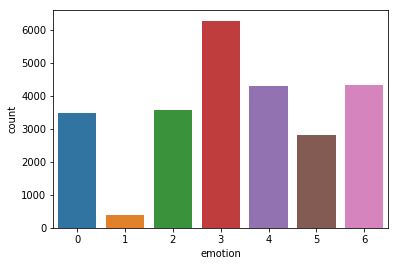

In [9]:
sns.countplot(y_train)
plt.show()

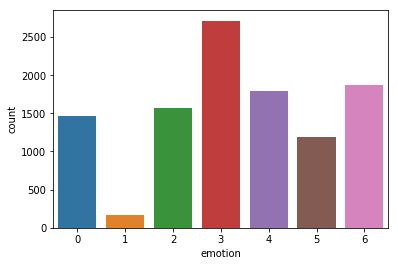

In [10]:
sns.countplot(y_test)
plt.show()

In [11]:
# param_grid setting for gridsearch
param_grid = {'weights':['uniform','distance'],
              'n_neighbors':[3,4,5,6,7,8,9,10]}

In [12]:
# model
grid_knn = KNeighborsClassifier()

In [13]:
grid_search = RandomizedSearchCV(grid_knn,param_grid, cv = 5,scoring = 'accuracy',n_iter=1,n_jobs = -1,verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.9min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=1, n_jobs=-1,
          param_distributions={'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)

In [14]:
print('Best score is:', grid_search.best_score_)
print('Best params are:', grid_search.best_params_)

Best score is: 0.3192675159235669
Best params are: {'weights': 'distance', 'n_neighbors': 7}


## Build knn model

In [15]:
# knn model
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], 
                           weights=grid_search.best_params_['weights'])
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

In [16]:
y_pred = knn.predict(X_test)
print(y_pred)

[3 3 6 ... 2 4 0]


In [17]:
# accuracy
scores = knn.score(X_test,y_test)
print('accuracy:',scores)

accuracy: 0.33175443484721834


In [18]:
# confusion matrix
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

array([[ 324,   11,  164,  256,  230,  153,  329],
       [  11,   49,   20,   24,   21,   13,   29],
       [ 137,    9,  426,  231,  216,  192,  355],
       [ 203,   22,  292, 1008,  336,  282,  571],
       [ 160,   12,  229,  281,  459,  194,  458],
       [  67,    5,  107,  120,   88,  581,  222],
       [ 139,    3,  195,  279,  256,  273,  725]])

Predicted,0,1,2,3,4,5,6,All
True,,,,,,,,
0,324,11,164,256,230,153,329,1467
1,11,49,20,24,21,13,29,167
2,137,9,426,231,216,192,355,1566
3,203,22,292,1008,336,282,571,2714
4,160,12,229,281,459,194,458,1793
5,67,5,107,120,88,581,222,1190
6,139,3,195,279,256,273,725,1870
All,1041,111,1433,2199,1606,1688,2689,10767


In [19]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.31      0.22      0.26      1467
           1       0.44      0.29      0.35       167
           2       0.30      0.27      0.28      1566
           3       0.46      0.37      0.41      2714
           4       0.29      0.26      0.27      1793
           5       0.34      0.49      0.40      1190
           6       0.27      0.39      0.32      1870

   micro avg       0.33      0.33      0.33     10767
   macro avg       0.34      0.33      0.33     10767
weighted avg       0.34      0.33      0.33     10767

